## Let's honor the work of others with citations:

## MLP Classifier:
### @article{scikit-learn,
### title={Scikit-learn: Machine Learning in {P}ython},
### author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
###         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
###         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
###         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
### journal={Journal of Machine Learning Research},
### volume={12},
### pages={2825--2830},
### year={2011}
### }

## Data from UCI machine learning repository:
## Chicco,Davide and Jurman,Giuseppe. (2023). Sepsis Survival Minimal Clinical Records. UCI Machine Learning Repository. https://doi.org/10.24432/C53C8N.


### Let's take a look at Neural Networks - Multi-Layer Perceptrons
### Perceptron is another work for neural network

### Here is some other terminology:
### Input - The actual data that we want our model to learn from. This data should be clean appropriately and in the correct representation
### Weights - The input to a neuron is multiplied by a weight value. The higher the weight, the higher the inpact of the input. Training a neural network involves finding the right weights to produce the most correct output
### Bias - This value allows the input to have some value prior to producing output. Biases allow shifting of the input to adjust the overall threshold

### Let's talk about our neural network and how it works: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
### The MLP classifier uses backpropogation in order to train the model parameters (note how this is different from hyper parameters)
### We implement the Softmax activation function for non-linearity


## Let's import our libraries

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
from sklearn.neural_network import MLPClassifier

### Let's take a look at our data. The download from the UCI machine learning repository includes three files. We are going to work with the primary file as the training set, the study cohort as the test set and the validation cohort as the validation set 

### Lets look at our data

In [40]:
train_df = pd.read_csv("./s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_primary_cohort.csv")

In [41]:
train_df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


### Let's get some statistics about the training set and work with that set from here on

In [42]:
train_df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


### Age is an interesting column here

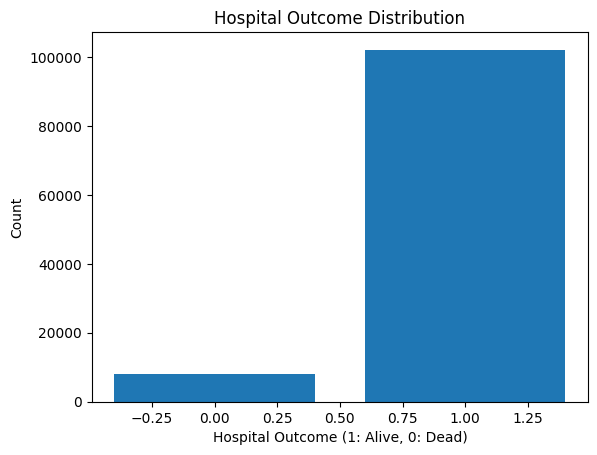

In [43]:
outcome_counts = train_df['hospital_outcome_1alive_0dead'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel('Hospital Outcome (1: Alive, 0: Dead)')
plt.ylabel('Count')
plt.title('Hospital Outcome Distribution')
plt.show()

### Cool, we now know what our data looks like
### Let's start constructing out neural network
### Let's choose a framework. There are several including, Tensorflow, PyTorch, and Scikit-Learn's classifiers
### We will pick one with no GPU support as we are not using GPU for this problem, sklearn's MLP classifier

### We are going to use our entire training dataset file to train the data and test it using our test dataset file

## Play with the classifier hyperparameters to see if the accuracy changes

In [44]:
X_train = train_df[['age_years', 'sex_0male_1female', 'hospital_outcome_1alive_0dead']].values
y_train = train_df['episode_number'].values
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size=128, learning_rate_init=0.001, shuffle=True, max_iter=1000, tol=1e-4, warm_start=False, early_stopping=True, validation_fraction=0.2, beta_1=0.9, beta_2=0.999, epsilon=1e-8, max_fun=100, random_state=42, verbose=True)
mlp_classifier.fit(X_train, y_train)
accuracy = mlp_classifier.score(X_train, y_train)
print("Accuracy on Test Data:", accuracy)


Iteration 1, loss = 0.83324770
Validation score: 0.767025
Iteration 2, loss = 0.76457444
Validation score: 0.767025
Iteration 3, loss = 0.76646541
Validation score: 0.767025
Iteration 4, loss = 0.76440373
Validation score: 0.767025
Iteration 5, loss = 0.76582652
Validation score: 0.767025
Iteration 6, loss = 0.76579325
Validation score: 0.767025
Iteration 7, loss = 0.76464386
Validation score: 0.767025
Iteration 8, loss = 0.76457186
Validation score: 0.767025
Iteration 9, loss = 0.76380474
Validation score: 0.767025
Iteration 10, loss = 0.76441916
Validation score: 0.767025
Iteration 11, loss = 0.76296474
Validation score: 0.767025
Iteration 12, loss = 0.76103033
Validation score: 0.767025
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy on Test Data: 0.769581866356938
